In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hydrant.topology.geom as gm
import subprocess
import os
from   shapely.geometry import Point, Polygon, MultiPolygon, box
from   PIL import Image
import glob
plt.rcParams["font.family"] = "Times New Roman"

ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/Users/shg096/Desktop/RiverLakeNetwork/env/RiverLakeEnv/lib/python3.9/site-packages/traitlets/traitlets.py", line 632, in get
    value = obj._trait_values[self.name]
KeyError: '_control_lock'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/shg096/Desktop/RiverLakeNetwork/env/RiverLakeEnv/lib/python3.9/site-packages/zmq/eventloop/zmqstream.py", line 565, in _log_error
    f.result()
  File "/Users/shg096/Desktop/RiverLakeNetwork/env/RiverLakeEnv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 301, in dispatch_control
    async with self._control_lock:
  File "/Users/shg096/Desktop/RiverLakeNetwork/env/RiverLakeEnv/lib/python3.9/site-packages/traitlets/traitlets.py", line 687, in __get__
    return t.cast(G, self.get(obj, cls))  # the G should encode the Optional
  File "/Users/shg096/Desktop/RiverLak

In [2]:
# load the original and corrected shapefile for HDMA (pfaf 3 - North America)
riv1_org = gpd.read_file('/Users/shg096/Desktop/LakeRiverOut/Tempdomain/pfaf3/pfaf3/riv.gpkg')
cat1_org = gpd.read_file('/Users/shg096/Desktop/LakeRiverOut/Tempdomain/pfaf3/pfaf3/cat.gpkg')
lake1_org = gpd.read_file('/Users/shg096/Desktop/LakeRiverOut/Tempdomain/pfaf3/pfaf3/lake.gpkg')
riv1 = gpd.read_file('/Users/shg096/Desktop/LakeRiverOut/domain/pfaf3/pfaf3/riv.gpkg')
cat1 = gpd.read_file('/Users/shg096/Desktop/LakeRiverOut/domain/pfaf3/pfaf3/cat.gpkg')
lake1 = gpd.read_file('/Users/shg096/Desktop/LakeRiverOut/domain/pfaf3/pfaf3/resolvable_lakes.gpkg')

# load the original and corrected shapefile for MERIT-Basins (pfaf 71 - Nelson, Sask, pfaf 73 - Mississippi)
riv2_org = gpd.read_file('/Users/shg096/Desktop/LakeRiverOut/Tempdomain/pfaf71/pfaf71/riv.gpkg')
cat2_org = gpd.read_file('/Users/shg096/Desktop/LakeRiverOut/Tempdomain/pfaf71/pfaf71/cat.gpkg')
lake2_org = gpd.read_file('/Users/shg096/Desktop/LakeRiverOut/Tempdomain/pfaf71/pfaf71/lake.gpkg')
riv2 = gpd.read_file('/Users/shg096/Desktop/LakeRiverOut/domain/pfaf71/pfaf71/riv.gpkg')
cat2 = gpd.read_file('/Users/shg096/Desktop/LakeRiverOut/domain/pfaf71/pfaf71/cat.gpkg')
lake2 = gpd.read_file('/Users/shg096/Desktop/LakeRiverOut/domain/pfaf71/pfaf71/resolvable_lakes.gpkg')

# load the original and corrected shapefile for the tailored river network
riv3_org = gpd.read_file('/Users/shg096/Desktop/LakeRiverOut/Tempdomain/pfaf71/pfaf71/riv.gpkg')
cat3_org = gpd.read_file('/Users/shg096/Desktop/LakeRiverOut/Tempdomain/pfaf71/pfaf71/cat.gpkg')
lake3_org = gpd.read_file('/Users/shg096/Desktop/LakeRiverOut/Tempdomain/pfaf71/pfaf71/lake.gpkg')
riv3 = gpd.read_file('/Users/shg096/Desktop/LakeRiverOut/domain/pfaf71/pfaf71/riv.gpkg')
cat3 = gpd.read_file('/Users/shg096/Desktop/LakeRiverOut/domain/pfaf71/pfaf71/cat.gpkg')
lake3 = gpd.read_file('/Users/shg096/Desktop/LakeRiverOut/domain/pfaf71/pfaf71/resolvable_lakes.gpkg')

In [3]:
# -------------------------------------------------------
# ZOOM WINDOW + 2° MARGIN (same as before)
# -------------------------------------------------------
xmin, xmax = -108.60, -106.40
ymin, ymax = 50.45, 51.50

margin = 2.0

xmin2 = xmin - margin
xmax2 = xmax + margin
ymin2 = ymin - margin
ymax2 = ymax + margin

# Small buffer in degrees
buffer_size = 0.001

def clip_box(df):
    return df.cx[xmin2:xmax2, ymin2:ymax2]

# Current folder
folder_path = './'

# Remove all PNG files
for file_path in glob.glob(os.path.join(folder_path, "*.png")):
    os.remove(file_path)

# Remove all PDF files
for file_path in glob.glob(os.path.join(folder_path, "*.pdf")):
    os.remove(file_path)

print("All PNG and PDF files have been removed from the current folder.")

All PNG and PDF files have been removed from the current folder.


/var/folders/yh/b1qy7zb96k980mcb2ps9n6d9t1c6zr/T/ipykernel_11860/296382567.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lake1_org_clip["geometry"] = lake1_org_clip.geometry.buffer(buffer_size)
/Users/shg096/Desktop/RiverLakeNetwork/env/RiverLakeEnv/lib/python3.9/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/var/folders/yh/b1qy7zb96k980mcb2ps9n6d9t1c6zr/T/ipykernel_11860/296382567.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries t

Original river count: 34
Original cat count: 55
Original lake count: 109
Resolvable river count: 30
Resolvable cat count: 57
Resolvable lake count: 2


/var/folders/yh/b1qy7zb96k980mcb2ps9n6d9t1c6zr/T/ipykernel_11860/296382567.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([" "] * len(ax.get_xticks()))
/Users/shg096/Desktop/RiverLakeNetwork/env/RiverLakeEnv/lib/python3.9/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/var/folders/yh/b1qy7zb96k980mcb2ps9n6d9t1c6zr/T/ipykernel_11860/296382567.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([" "] * len(ax.get_yticks()))
/var/folders/yh/b1qy7zb96k980mcb2ps9n6d9

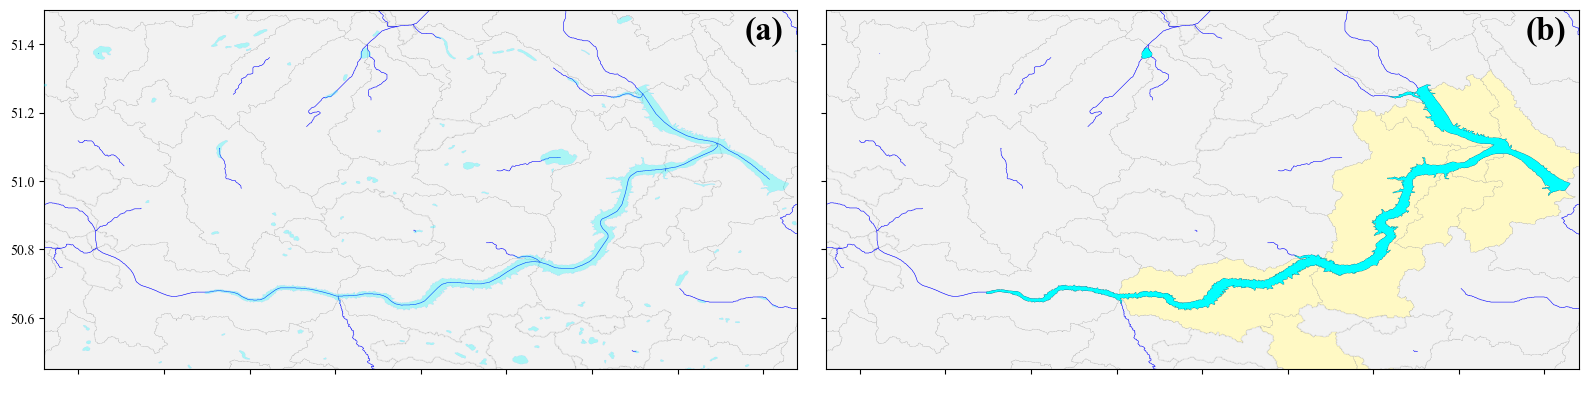

In [4]:
# -------------------------------------------------------
# CLIP ALL LAYERS TO REDUCED DOMAIN
# (for the second dataset: riv2, cat2, lake2)
# -------------------------------------------------------
riv1_org_clip  = clip_box(riv1_org)
cat1_org_clip  = clip_box(cat1_org)
lake1_org_clip = clip_box(lake1_org)
lake1_org_clip["geometry"] = lake1_org_clip.geometry.buffer(buffer_size)

riv1_clip  = clip_box(riv1)
cat1_clip  = clip_box(cat1)
lake1_clip = clip_box(lake1)
lake1_clip["geometry"] = lake1_clip.geometry.buffer(buffer_size)

bbox = gpd.GeoDataFrame(geometry=[box(xmin, ymin, xmax, ymax)], crs=riv1_org_clip.crs)
riv1_org_count = gpd.sjoin(riv1_org_clip, bbox, how="inner", predicate="intersects"); print(f"Original river count: {len(riv1_org_count)}")
cat1_org_count = gpd.sjoin(cat1_org_clip, bbox, how="inner", predicate="intersects"); print(f"Original cat count: {len(cat1_org_count)}")
lake1_org_count = gpd.sjoin(lake1_org_clip, bbox, how="inner", predicate="intersects"); print(f"Original lake count: {len(lake1_org_count)}")
riv1_count = gpd.sjoin(riv1_clip, bbox, how="inner", predicate="intersects"); print(f"Resolvable river count: {len(riv1_count)}")
cat1_count = gpd.sjoin(cat1_clip, bbox, how="inner", predicate="intersects"); print(f"Resolvable cat count: {len(cat1_count)}")
lake1_count = gpd.sjoin(lake1_clip, bbox, how="inner", predicate="intersects"); print(f"Resolvable lake count: {len(lake1_count)}")

# -------------------------------------------------------
# PLOTTING (side-by-side panels)
# -------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 10))

# ========== LEFT: ORIGINAL ==========
ax = axes[0]
cat1_org_clip.plot(ax=ax, color='#F2F2F2', edgecolor="grey", linewidth=0.1, zorder=1)
riv1_org_clip.plot(ax=ax, color="blue", linewidth=0.4, zorder=2)
lake1_org_clip.plot(ax=ax, facecolor="cyan", edgecolor="blue", linewidth=0.1, linestyle="--", alpha=0.3, zorder=3)

# ax.set_title("Original Network (Dataset 1)", fontsize=14)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_aspect('equal')

# Replace y-ticks with empty space
ax.set_xticklabels([" "] * len(ax.get_xticks()))

# Add annotation (a)
ax.text(xmin + 0.93*(xmax-xmin), ymax - 0.08*(ymax-ymin), "(a)", fontsize=24, fontweight='bold', color='black')

# ========== RIGHT: CORRECTED ==========
ax = axes[1]
cat1_clip.plot(ax=ax, facecolor=cat1_clip['coastal'].map(lambda x: '#FFF9C4' if x==1 else '#F2F2F2'), \
               edgecolor="grey", linewidth=0.1, zorder=1)
riv1_clip.plot(ax=ax, color="blue", linewidth=0.4, zorder=2)
lake1_clip["endorheic"] = riv1_clip ["endorheic"]
lake1_clip.plot(ax=ax, facecolor=lake1_clip['endorheic'].map(lambda x: 'royalblue' if x==1 else 'cyan'), \
                edgecolor="black", linewidth=0.1, zorder=3)

# ax.set_title("Corrected Network (Dataset 1)", fontsize=14)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_aspect('equal')

# Replace x-ticks and y-ticks with empty space
ax.set_yticklabels([" "] * len(ax.get_yticks()))
ax.set_xticklabels([" "] * len(ax.get_xticks()))

# Add annotation (b)
ax.text(xmin + 0.93*(xmax-xmin), ymax - 0.08*(ymax-ymin), "(b)", fontsize=24, fontweight='bold', color='black')

# ========== SHOW ==========
plt.tight_layout()
fig.savefig("figure1_a_b.png", format="png", dpi=1200, bbox_inches='tight')  # very high resolution
plt.show(fig)

/var/folders/yh/b1qy7zb96k980mcb2ps9n6d9t1c6zr/T/ipykernel_11860/2477029981.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lake2_org_clip["geometry"] = lake2_org_clip.geometry.buffer(buffer_size)
/Users/shg096/Desktop/RiverLakeNetwork/env/RiverLakeEnv/lib/python3.9/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/var/folders/yh/b1qy7zb96k980mcb2ps9n6d9t1c6zr/T/ipykernel_11860/2477029981.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries

Original river count: 396
Original cat count: 429
Original lake count: 83
Resolvable river count: 370
Resolvable cat count: 444
Resolvable lake count: 16


/var/folders/yh/b1qy7zb96k980mcb2ps9n6d9t1c6zr/T/ipykernel_11860/2477029981.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([" "] * len(ax.get_xticks()))
/Users/shg096/Desktop/RiverLakeNetwork/env/RiverLakeEnv/lib/python3.9/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/var/folders/yh/b1qy7zb96k980mcb2ps9n6d9t1c6zr/T/ipykernel_11860/2477029981.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([" "] * len(ax.get_yticks()))
/var/folders/yh/b1qy7zb96k980mcb2ps9n6

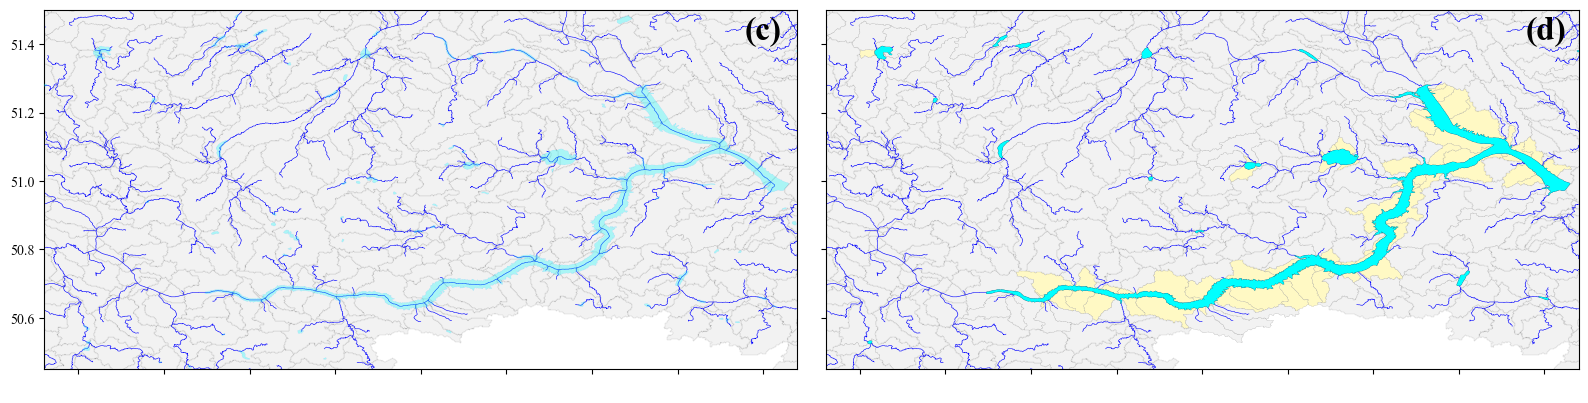

In [5]:
# -------------------------------------------------------
# CLIP ALL LAYERS TO REDUCED DOMAIN
# (for the second dataset: riv2, cat2, lake2)
# -------------------------------------------------------
riv2_org_clip  = clip_box(riv2_org)
cat2_org_clip  = clip_box(cat2_org)
lake2_org_clip = clip_box(lake2_org)
lake2_org_clip["geometry"] = lake2_org_clip.geometry.buffer(buffer_size)

riv2_clip  = clip_box(riv2)
cat2_clip  = clip_box(cat2)
lake2_clip = clip_box(lake2)
lake2_clip["geometry"] = lake2_clip.geometry.buffer(buffer_size)

bbox = gpd.GeoDataFrame(geometry=[box(xmin, ymin, xmax, ymax)], crs=riv2_org_clip.crs)
riv2_org_count = gpd.sjoin(riv2_org_clip, bbox, how="inner", predicate="intersects"); print(f"Original river count: {len(riv2_org_count)}")
cat2_org_count = gpd.sjoin(cat2_org_clip, bbox, how="inner", predicate="intersects"); print(f"Original cat count: {len(cat2_org_count)}")
lake2_org_count = gpd.sjoin(lake2_org_clip, bbox, how="inner", predicate="intersects"); print(f"Original lake count: {len(lake2_org_count)}")
riv2_count = gpd.sjoin(riv2_clip, bbox, how="inner", predicate="intersects"); print(f"Resolvable river count: {len(riv2_count)}")
cat2_count = gpd.sjoin(cat2_clip, bbox, how="inner", predicate="intersects"); print(f"Resolvable cat count: {len(cat2_count)}")
lake2_count = gpd.sjoin(lake2_clip, bbox, how="inner", predicate="intersects"); print(f"Resolvable lake count: {len(lake2_count)}")

# -------------------------------------------------------
# PLOTTING (side-by-side panels)
# -------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 10))

# ========== LEFT: ORIGINAL ==========
ax = axes[0]
cat2_org_clip.plot(ax=ax, color='#F2F2F2', edgecolor="grey", linewidth=0.1, zorder=1)
riv2_org_clip.plot(ax=ax, color="blue", linewidth=0.4, zorder=2)
lake2_org_clip.plot(ax=ax, facecolor="cyan", edgecolor="blue", linewidth=0.1, linestyle="--", alpha=0.3, zorder=3)

# ax.set_title("Original Network (Dataset 1)", fontsize=14)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_aspect('equal')

# Replace y-ticks with empty space
ax.set_xticklabels([" "] * len(ax.get_xticks()))

# Add annotation (c)
ax.text(xmin + 0.93*(xmax-xmin), ymax - 0.08*(ymax-ymin), "(c)", fontsize=24, fontweight='bold', color='black')

# ========== RIGHT: CORRECTED ==========
ax = axes[1]
cat2_clip.plot(ax=ax, facecolor=cat2_clip['coastal'].map(lambda x: '#FFF9C4' if x==1 else '#F2F2F2'), \
               edgecolor="grey", linewidth=0.1, zorder=1)
riv2_clip.plot(ax=ax, color="blue", linewidth=0.4, zorder=2)
lake2_clip["endorheic"] = riv2_clip ["endorheic"]
lake2_clip.plot(ax=ax, facecolor=lake2_clip['endorheic'].map(lambda x: 'royalblue' if x==1 else 'cyan'), \
                edgecolor="black", linewidth=0.1, zorder=3)

# ax.set_title("Corrected Network (Dataset 1)", fontsize=14)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_aspect('equal')

# Replace x-ticks and y-ticks with empty space
ax.set_yticklabels([" "] * len(ax.get_yticks()))
ax.set_xticklabels([" "] * len(ax.get_xticks()))

# Add annotation (d)
ax.text(xmin + 0.93*(xmax-xmin), ymax - 0.08*(ymax-ymin), "(d)", fontsize=24, fontweight='bold', color='black')

# ========== SHOW ==========
plt.tight_layout()
fig.savefig("figure1_c_d.png", format="png", dpi=1200, bbox_inches='tight')  # very high resolution
plt.show(fig)

/var/folders/yh/b1qy7zb96k980mcb2ps9n6d9t1c6zr/T/ipykernel_11860/3348898149.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lake3_org_clip["geometry"] = lake3_org_clip.geometry.buffer(buffer_size)
/Users/shg096/Desktop/RiverLakeNetwork/env/RiverLakeEnv/lib/python3.9/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/var/folders/yh/b1qy7zb96k980mcb2ps9n6d9t1c6zr/T/ipykernel_11860/3348898149.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries

Original river count: 396
Original cat count: 429
Original lake count: 83
Resolvable river count: 370
Resolvable cat count: 444
Resolvable lake count: 16


/Users/shg096/Desktop/RiverLakeNetwork/env/RiverLakeEnv/lib/python3.9/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/var/folders/yh/b1qy7zb96k980mcb2ps9n6d9t1c6zr/T/ipykernel_11860/3348898149.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([" "] * len(ax.get_yticks()))


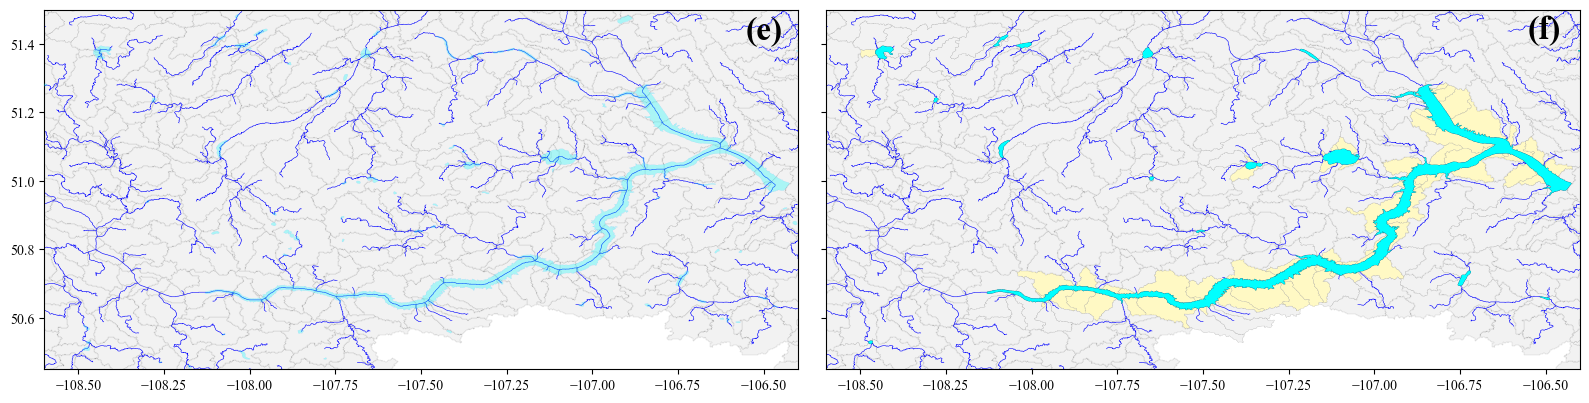

In [6]:
# -------------------------------------------------------
# CLIP ALL LAYERS TO REDUCED DOMAIN
# (for the second dataset: riv3, cat3, lake3)
# -------------------------------------------------------
riv3_org_clip  = clip_box(riv3_org)
cat3_org_clip  = clip_box(cat3_org)
lake3_org_clip = clip_box(lake3_org)
lake3_org_clip["geometry"] = lake3_org_clip.geometry.buffer(buffer_size)

riv3_clip  = clip_box(riv3)
cat3_clip  = clip_box(cat3)
lake3_clip = clip_box(lake3)
lake3_clip["geometry"] = lake3_clip.geometry.buffer(buffer_size)

bbox = gpd.GeoDataFrame(geometry=[box(xmin, ymin, xmax, ymax)], crs=riv3_org_clip.crs)
riv3_org_count = gpd.sjoin(riv3_org_clip, bbox, how="inner", predicate="intersects"); print(f"Original river count: {len(riv3_org_count)}")
cat3_org_count = gpd.sjoin(cat3_org_clip, bbox, how="inner", predicate="intersects"); print(f"Original cat count: {len(cat3_org_count)}")
lake3_org_count = gpd.sjoin(lake3_org_clip, bbox, how="inner", predicate="intersects"); print(f"Original lake count: {len(lake3_org_count)}")
riv3_count = gpd.sjoin(riv3_clip, bbox, how="inner", predicate="intersects"); print(f"Resolvable river count: {len(riv3_count)}")
cat3_count = gpd.sjoin(cat3_clip, bbox, how="inner", predicate="intersects"); print(f"Resolvable cat count: {len(cat3_count)}")
lake3_count = gpd.sjoin(lake3_clip, bbox, how="inner", predicate="intersects"); print(f"Resolvable lake count: {len(lake3_count)}")

# -------------------------------------------------------
# PLOTTING (side-by-side panels)
# -------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 10))

# ========== LEFT: ORIGINAL ==========
ax = axes[0]
cat3_org_clip.plot(ax=ax, color='#F2F2F2', edgecolor="grey", linewidth=0.1, zorder=1)
riv3_org_clip.plot(ax=ax, color="blue", linewidth=0.4, zorder=2)
lake3_org_clip.plot(ax=ax, facecolor="cyan", edgecolor="blue", linewidth=0.1, linestyle="--", alpha=0.3, zorder=3)

# ax.set_title("Original Network (Dataset 1)", fontsize=14)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_aspect('equal')

# Replace y-ticks with empty space
#ax.set_xticklabels([" "] * len(ax.get_xticks()))

# Add annotation (e)
ax.text(xmin + 0.93*(xmax-xmin), ymax - 0.08*(ymax-ymin), "(e)", fontsize=24, fontweight='bold', color='black')

# ========== RIGHT: CORRECTED ==========
ax = axes[1]
cat3_clip.plot(ax=ax, facecolor=cat3_clip['coastal'].map(lambda x: '#FFF9C4' if x==1 else '#F2F2F2'), \
               edgecolor="grey", linewidth=0.1, zorder=1)
riv3_clip.plot(ax=ax, color="blue", linewidth=0.4, zorder=2)
lake3_clip["endorheic"] = riv3_clip ["endorheic"]
lake3_clip.plot(ax=ax, facecolor=lake3_clip['endorheic'].map(lambda x: 'royalblue' if x==1 else 'cyan'), \
                edgecolor="black", linewidth=0.1, zorder=3)

# ax.set_title("Corrected Network (Dataset 1)", fontsize=14)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_aspect('equal')

# Replace x-ticks and y-ticks with empty space
ax.set_yticklabels([" "] * len(ax.get_yticks()))
#ax.set_xticklabels([" "] * len(ax.get_xticks()))

# Add annotation (f)
ax.text(xmin + 0.93*(xmax-xmin), ymax - 0.08*(ymax-ymin), "(f)", fontsize=24, fontweight='bold', color='black')

# ========== SHOW ==========
plt.tight_layout()
fig.savefig("figure1_e_f.png", format="png", dpi=1200, bbox_inches='tight')  # very high resolution
plt.show(fig)

In [7]:
# ----------------------------
# Merge PNGs vertically
# ----------------------------
png_files = ["figure1_a_b.png", "figure1_c_d.png", "figure1_e_f.png"]
images = [Image.open(png) for png in png_files]

# Calculate total width and height
total_width = max(img.width for img in images)
total_height = sum(img.height for img in images)

# Create a new blank image
merged_image = Image.new('RGB', (total_width, total_height), (255, 255, 255))

# Paste images one below the other
y_offset = 0
for img in images:
    merged_image.paste(img, (0, y_offset))
    y_offset += img.height

# Save the final merged image
merged_image.save("Figure_1.png", dpi=(1200, 1200))

# Remove the png files
for file in png_files:
    if os.path.exists(file):
        os.remove(file)
        print(f"Removed {file}")
    else:
        print(f"{file} does not exist")

/Users/shg096/Desktop/RiverLakeNetwork/env/RiverLakeEnv/lib/python3.9/site-packages/PIL/Image.py:3452: DecompressionBombWarning: Image size (91916964 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/Users/shg096/Desktop/RiverLakeNetwork/env/RiverLakeEnv/lib/python3.9/site-packages/PIL/Image.py:3452: DecompressionBombWarning: Image size (92046525 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Removed figure1_a_b.png
Removed figure1_c_d.png
Removed figure1_e_f.png
